In [310]:
from casadi import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

# from math import sin, cos, exp, sqrt



0.0003367768532824227 5.362632380167144 5.113164058144344


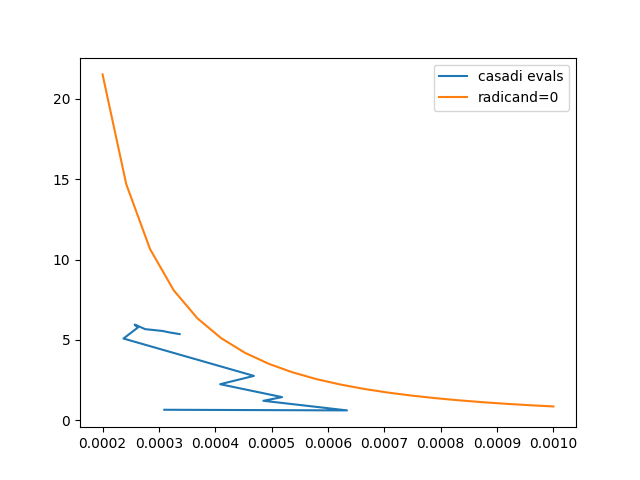

In [356]:
m_l = 0.5 #mass to push off ground
k = 3000 #spring stiffness
tau_max = 0.05 #N*m stall torque
omega_max = 3000 #about 10,000rpm free speed

t = 0.2

opti = Opti()
T1 = opti.variable()
T2 = opti.variable()

x_a0 = opti.parameter()
opti.set_value(x_a0, 0)
x_l0 = opti.parameter()
opti.set_value(x_l0, 0)
v_l0 = opti.parameter()
opti.set_value(v_l0, 0)

x0 = 1/T2
x1 = T2**2
x2 = omega_max**2
x3 = x1*x2
x4 = k**2
x5 = m_l**2
x6 = T1**4*x5
x7 = x4*x6
x9 = 1/tau_max
x10 = (1/2)*x9
x12 = T1**2
x13 = omega_max*t
x14 = k*x10*x12*x13
x15 = exp(x14)
x16 = tau_max*x15
x17 = x16*x_a0
x18 = T1*omega_max
x19 = T2*m_l*v_l0*x18
x20 = m_l*x12
x21 = x20*x3
x22 = k*m_l
x23 = 2*tau_max
x24 = x23*x_l0
x25 = x12*x22
x26 = x23*x_a0
x27 = T2*omega_max
x28 = T2**3
x29 = omega_max**3
x30 = T1**3
x32 = exp(-x14)
x33 = x32*x9
x34 = x1*x18
x35 = T2*v_l0 - x34
x36 = 2*k
x37 = T1*T2
x38 = omega_max*x1
x39 = 2*v_l0*x25*x38
x40 = x2*x28
x41 = x22*x30*x40
x42 = 2*x41
x43 = tau_max*x36
x44 = -x37*x43*x_a0 + x43*x_l0

x8 = sqrt(4*k*m_l*tau_max**2 - x3*x7)
x11 = t*x0*x10*x8/m_l

S_in = math.sin(x11)
C_os = math.cos(x11)
R_ad = x8
x31 = S_in/R_ad
x_a = x33*(C_os*(-x19 + x21) + x13*x16 + x15*x19 - x15*x21 + x17 + x31*(-k*v_l0*x3*x30*x5 + k*x28*x29*x6 + x18*x22*x24 - x25*x26*x27))
x_l = (1/2)*x33*(C_os*(-x39 + x42 + x44) + R_ad*S_in*x35 + T2*t*x16*x18*x36 + x15*x39 - x15*x42 + x17*x36*x37 + x31*(T1**5*T2**4*x29*x4*x5 - m_l*x26*x30*x38*x4 - v_l0*x40*x7 + x20*x24*x27*x4))/k
v_l = x0*x32*(C_os*x35 + x15*x34 + x31*(k*m_l*omega_max*v_l0*x1*x12 - x41 - x44))


opti.minimize(-v_l)

opti.subject_to(opti.bounded(1e-6, T1, 0.001))
opti.subject_to(opti.bounded(1e-6, T2, 20))
# opti.subject_to(opti.bounded(0, T1**4*T2**2*k**2*m_l**2*omega_max**2 - 4*k*m_l*tau_max**2, 1))
opti.subject_to(0 > T1**4*T2**2*k**2*m_l**2*omega_max**2 - 4*k*m_l*tau_max**2)

# opti.set_initial(T1, 0.0003)
# opti.set_initial(T2, 5)
opti.set_initial(T1, np.random.uniform(0.0002, 0.001))
opti.set_initial(T2, np.random.uniform(1e-6, 20))

log = []
opti.callback(lambda i: log.append((opti.debug.value(T1), opti.debug.value(T2), opti.debug.value(v_l))))

opts = {'ipopt.print_level':0, 'print_time':0}

opti.solver('ipopt', opts)
sol = opti.solve()

plt.close('a')

log = np.array(log)
T1s = log[:,0]
T2s = log[:,1]
v_ls = log[:,2]

plt.figure()
plt.plot(T1s, T2s, label='casadi evals')

testlog = []
for _T1test in np.linspace(0.0002, 0.001, 20):
    # T1**4*T2**2*k**2*m_l**2*omega_max**2 - 4*k*m_l*tau_max**2 = 0
    # 4*k*m_l*tau_max**2 = T1**4*T2**2*k**2*m_l**2*omega_max**2
    T2_test = sqrt(4*k*m_l*tau_max**2 / (_T1test**4*k**2*m_l**2*omega_max**2))
    testlog.append((_T1test, T2_test))
testlog = np.array(testlog)
plt.plot(testlog[:,0], testlog[:,1], label='radicand=0')
plt.legend()

print(sol.value(T1), sol.value(T2), sol.value(v_l))

0.0003367768457311691 5.362632423410984 5.113164058144339


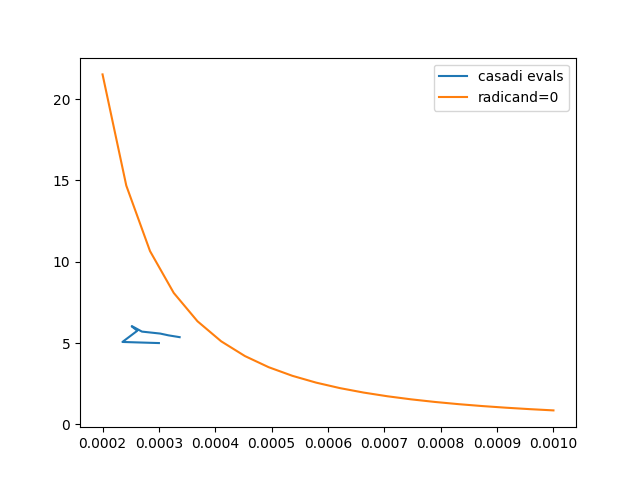

In [321]:
plt.close('a')

print(sol.value(T1), sol.value(T2), sol.value(v_l))

log = np.array(log)
T1s = log[:,0]
T2s = log[:,1]
v_ls = log[:,2]

plt.figure()
plt.plot(T1s, T2s, label='casadi evals')

testlog = []
for _T1test in np.linspace(0.0002, 0.001, 20):
    # T1**4*T2**2*k**2*m_l**2*omega_max**2 - 4*k*m_l*tau_max**2 = 0
    # 4*k*m_l*tau_max**2 = T1**4*T2**2*k**2*m_l**2*omega_max**2
    T2_test = sqrt(4*k*m_l*tau_max**2 / (_T1test**4*k**2*m_l**2*omega_max**2))
    testlog.append((_T1test, T2_test))
testlog = np.array(testlog)
plt.plot(testlog[:,0], testlog[:,1], label='radicand=0')
plt.legend()
